In this exercise, we are dealing with images and their manipulation. I think the underlying idea is for us to see how we can transform an image into pixels which are filled in an array

In [23]:
#We are required to import these
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
from PIL import Image

#Then we are setting the parameters for better plots. This I am yet to understand but maybe once we are done with this week's work, we will venture into that too.

pl.rcParams.update(
    {
        "lines.markersize":10, #Big font?
        "font.size": 15,
        "xtick.major.size": 5.0,
        "ytick.major.size": 5.0
    }
)

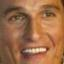

The image size if (64, 64)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [24]:
image = Image.open("faces/smile/Matthew_McConaughey_0001.jpg") #.open is a method in image module that allows for us to load a picture. It is a temporary data container for the image with datatype jpeg or png
display(image)

print(f"The image size if {image.size}")
#It turns out that it is 64 by 64 pixels
print(type(image)) #Datatype is PIL.jpegImageplugin.jpegimagefile. Basically a datatype inside the Image module

In [25]:
#We can transform this data into a format that we can easily access e.g., numpy array
image_data = np.array(image) # This is the point where we move it to a numpy array datatype which we can then manipulate with numpy methods
print(image_data.shape) #This returns the length by width by height (sort of)
print(type(image_data)) #returns a numpy array - a type that we can manipulate using numpy tools
print(image_data) #the image contains intensity of the Red, Green and Blue pixel each with a specific layer. The 64, 64,3 are indices - pointers to the container that has the value

(64, 64, 3)
<class 'numpy.ndarray'>
[[[106  78  64]
  [107  79  65]
  [109  80  66]
  ...
  [103  58  19]
  [ 83  38   9]
  [ 72  28   3]]

 [[106  78  64]
  [106  78  64]
  [108  79  65]
  ...
  [107  62  23]
  [ 87  42  13]
  [ 75  31   6]]

 [[104  78  61]
  [105  79  62]
  [107  80  63]
  ...
  [118  70  30]
  [ 94  47  17]
  [ 77  31   5]]

 ...

 [[ 79  58  31]
  [ 88  67  40]
  [ 98  74  50]
  ...
  [123  77  28]
  [ 99  60  19]
  [126  91  53]]

 [[ 86  64  40]
  [ 92  70  46]
  [ 99  75  51]
  ...
  [102  58   9]
  [ 89  52   8]
  [142 109  68]]

 [[ 97  75  51]
  [102  80  56]
  [105  81  57]
  ...
  [100  56   7]
  [ 99  62  18]
  [177 144 103]]]


In [26]:
#We could try to flatten the data into a single array
a = image_data.flatten("F")
print(type(a)) #still a numpy array 
print(len(a))#contains 12288 elements which can be accessed as x, y, z where x is the number of steps we move from the right to the left, y is the number downwards and z is the number of steps behind. If 0, we are on the top layer, 1 mid layer and 2 lower layer. Remember, containers and actual values.
print(a)

<class 'numpy.ndarray'>
12288
[106 106 104 ...  53  68 103]


(640, 640, 3)
<class 'numpy.ndarray'>


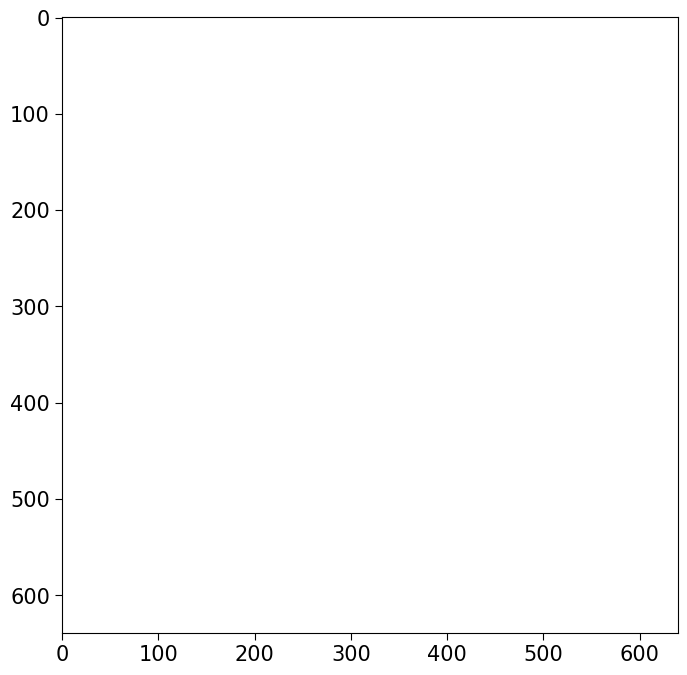

In [47]:
#Now we create our canvas
#canvas = 255*np.ones((640,640,3)) #We are creating a three layed square of 640 pixel spaces along the length and height, setting them to 1 and then multiplying that by 255 to set all of them to 255. It brings up a weird color so we will just go with white instead
canvas = 255*np.ones((640,640,3), dtype = int)
fig,ax = pl.subplots(figsize = (8,8))
pl.imshow(canvas)
print(canvas.shape) # this now returns 640, 640 by 3
#Note that unlike our previous image which was created by PIL, this one is by matplotlib, so check datatype
print(type(canvas))#returns ndarray which means it is an array. In that case, this one and the image_data are ready to be operated on at the same time

In [28]:
#However, we need to reshape the canvas too
b = canvas.flatten("F")
print(len(b)) # returns 1228800
print(type(b)) # still ndarray hence an array to be operated on by numpy methods
print(b) #returns some sort of a list, a long list


1228800
<class 'numpy.ndarray'>
[255 255 255 ... 255 255 255]


In [29]:
#Now let us confirm if this actually worked
#When we try to call a number from the unflatenned array, we expect that we must give three values (x, y,z) for it to work. If we give it less, we expect an error. Let us try
print(image_data[4, 0,0]) # returns a list containing three values [110  81  65]
print(a[4]) #Imagine: This computer screen and its thickness. So what this program does is splits the screen across into the number of rows then starts reading from left to right (0,0,0) to (1,0,0) to (63,0,0) for a 64 length screen. Then it goes to the second strip and appends that to the first strip such that we are starting from 64 onwards until it gets to the bottom of the screen then starts the same process with the second slice (with z now set to 1)
#So if we have 8 by 8 by 8 matrix that we want to fit into a bigger cuboid of 640 by 640 by 3, flattening it is not the best way to go
#We have to set the triple loop

101
101


In [30]:
#Try accessing data from image_data - the unflattened version
print(image_data[6,9,1]) # returns 74, a value that is located when you move from the 0th to the 6th (left to right) then to the 9th in the y direction (downwards) and to the middle layer (the Green layer)

74


In [31]:
#To set for loop, let's create an array variable that will tell us the length and width and height of data
mathew_size = image_data.shape
print(mathew_size) # returns (64, 64, 3)
print(type(mathew_size)) # it is a tuple datatype
print(mathew_size[0]) # returns 64. This is the way to access data in a tuple, almost same as for a list

(64, 64, 3)
<class 'tuple'>
64


In [32]:
#Now let's try set up the for loop
values = range(4)
print(values) # it does not return a list, it returns a range class typed at the output as range(0, 4) 
print(type(values)) # this is a class.
for i in values:
    print(i) # prints 0,1,2,3. This is the index, the pointer for the container from index 0,1,2,3.
for i in values:
    print(values[i]) # it just so happens that the range function generates a range of numbers from 0 to (last - 1) such that the index and the value that the index contains are the same.

    #You could opt to transform this into a list by using the .tolist method. Actually no, you can create one directly by using the lrange method. No, you call list on it

listed_value = list(values)
print(listed_value) #[0, 1, 2, 3]
print(type(listed_value)) # returns class: list

range(0, 4)
<class 'range'>
0
1
2
3
0
1
2
3
[0, 1, 2, 3]
<class 'list'>


In [33]:
#Let's try print a few of the first boxes in the image
print(image_data[0])#If you imagine a cuboid standing upright, we are chopping off the first slice at the very base (x = 0 there) This returns either three arrays of 64 each (if we are counting y first then z after) or 64 arrays of 3 each. What this is saying is that holding x constant at the base (0) layer, for every step we move in y, this if the first value we will put in the z = 0 (Red), then the z = 1 (Blue layer) and z = 2 (Green layer)
#for i in range(4):
    #print(image_data[i])

[[106  78  64]
 [107  79  65]
 [109  80  66]
 [110  81  67]
 [115  81  69]
 [118  84  72]
 [123  85  72]
 [124  87  71]
 [127  85  69]
 [127  84  65]
 [131  86  65]
 [136  90  66]
 [138  91  63]
 [137  91  58]
 [142  93  61]
 [148 100  64]
 [160 115  74]
 [159 114  72]
 [163 114  74]
 [167 115  76]
 [173 119  83]
 [179 123  88]
 [185 124  93]
 [187 126  95]
 [191 131  97]
 [189 130  96]
 [195 137 100]
 [203 150 110]
 [207 154 112]
 [202 154 108]
 [204 156 108]
 [211 160 115]
 [210 150 114]
 [210 145 113]
 [205 142 107]
 [204 141 106]
 [203 143 106]
 [205 146 106]
 [204 146 106]
 [204 147 102]
 [196 139  94]
 [202 146  97]
 [205 149  98]
 [204 149  93]
 [206 150  93]
 [209 153  94]
 [210 154  93]
 [210 152  89]
 [205 139  79]
 [206 138  77]
 [204 134  75]
 [200 130  71]
 [197 125  67]
 [192 120  61]
 [187 116  54]
 [183 114  49]
 [183 116  48]
 [167 104  37]
 [165 107  44]
 [163 111  54]
 [138  87  40]
 [103  58  19]
 [ 83  38   9]
 [ 72  28   3]]


In [34]:
#Now let us step it up a bit further
print(image_data[0][0]) # What this means is that if we held the x and y constant.We stay at the origin, then we start moving in the z direction, this is what we would put in the Red, then Blue then Green points. So we expect a list of 3 elements, index 0 being Red, 1 being Blue and 2 Green

#Indeed, returns [106  78  64]. This point, therefore, has a greater amount of Red and least of Blue

[106  78  64]


In [35]:
#A step further, we can try identify what we would put at a specific point. For example, at the origin, what amount of Blue intensity (layer 3, index 2) do we have?
print(image_data[0][0][1]) # returns 78

78


In [14]:
#Now lets advance to for loops where will try to pick
for i in range (mathew_size[0]): #Note that we finally adjusted this and now we are using the tuple
    for j in range (mathew_size[1]):
        for k in range (mathew_size[2]): # with this set to 2, we expect row zero, column zero and z 0 and 1 to change. Basically, this first line of three elements, we expect the first two to change from 255, 255 to something else. It changes. It goes to 106, 78 which are the first two element 
            canvas[i][j][k] = image_data[i][j][k]

print(canvas)

[[[106  78  64]
  [107  79  65]
  [109  80  66]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[106  78  64]
  [106  78  64]
  [108  79  65]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[104  78  61]
  [105  79  62]
  [107  80  63]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


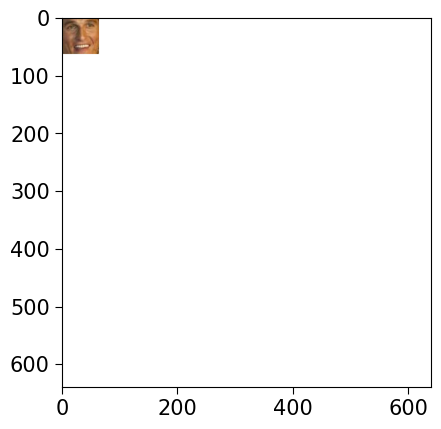

In [15]:
#Now let us see if we can visualise the picture
pl.imshow(canvas)
#This should work but for some reason, I cannot see it on mine. Worth checking with someone else on how they did this.
#It works now. The error that came up was the PIL could not handle this datatype. That is because I needed to specify the data as an integer. That is where all the problem was.

In [16]:
# #Let's try an alternative approach. This is done when all the data is in the PIL format
# canvas_image = Image.fromarray(canvas)
# canvas_image.show()
# # canvas_image.paste(image)
# # canvas_image.imshow()

#We can chill with this for now. We will come back to it later

In the next step, we now want to do the same process but for several figures.
Again, I am thinking that the glob method is going to help us. But we need to be extremely careful with the method in which we combine this data.

In [17]:
#Actually it doesn't matter the order. As long as we have images pasted one after the other
import glob
path = "faces/smile"
all_images = glob.glob(path + "/*.jpg")
print(len(all_images)) # Returns 600. The data content is actually a list of titles for the 600 images

600


<class 'PIL.JpegImagePlugin.JpegImageFile'>
(64, 64)


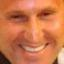

<class 'numpy.ndarray'>
12288
(64, 64, 3)
<class 'list'>
600
[[[249 226 220]
  [250 227 221]
  [245 222 214]
  ...
  [234 206 221]
  [236 208 223]
  [236 208 223]]

 [[242 219 213]
  [234 211 205]
  [221 198 190]
  ...
  [232 204 219]
  [234 206 221]
  [234 206 221]]

 [[233 208 201]
  [218 193 186]
  [197 172 165]
  ...
  [231 203 218]
  [234 206 221]
  [234 206 221]]

 ...

 [[232 201 196]
  [243 212 207]
  [243 212 207]
  ...
  [128  93  97]
  [143 111 114]
  [165 133 136]]

 [[234 205 199]
  [240 211 205]
  [241 212 208]
  ...
  [137 102 106]
  [150 118 121]
  [166 134 137]]

 [[243 216 209]
  [244 217 210]
  [246 217 213]
  ...
  [146 111 115]
  [158 126 129]
  [166 134 137]]]
12288
(64, 64, 3)
(38400, 64, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[249 226 220]
(38400, 64, 3)


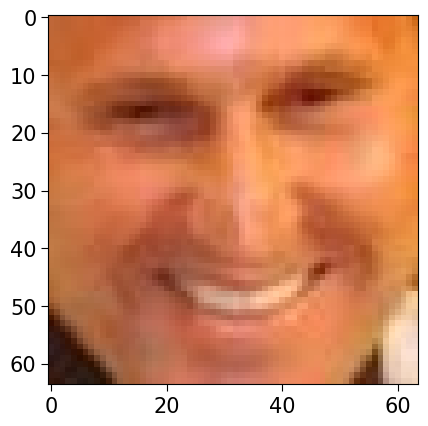

In [44]:
#Now we try to reshape this into a 640 by 640 by 3 datapoints
image_data = [] # remember that the np.array converts this into an ndimensional array. 
#print(image_data.shape)
n = 1
for filename in all_images:
    image = Image.open(filename) # This opens each file then loads its as a JPEG
    image1 = np.array(image) # This takes that file and saves it into an array format
    image_data.append(image1)

print(type(image)) # this is the PIL image datatype. It is a jpeg
print(image.size) # returns 64 by 64 which means that it is still dealing with pixels
display(image)#displays the last image on this list. At the end of the iteration
print(type(image1)) #This is now a numpy array. Still, for the last picture though - we are at the end of the iteration
print(image1.size) #It has 12288 elements
print(image1.shape) # arranged in the format of 64 by 64 by 3
pl.imshow(image1) # Shows the image zoomed in on the 64 by 64 pixel
print(type(image_data)) #This turns out to be list
print(len(image_data)) #It is composed of 600 elements. I am guessing it is the pictures
print(image_data[0]) #When printed, returns a bunch of values. Seemingly the pixel information for the first picture. The first line is 249, 226, 220
print(image_data[0].size) #contains 12288 elements
print(image_data[0].shape) #Inthe shape of 64 by 64 by 3

#The next thing we need to do now is concatenate all these into one long list. Why though? We could just go directly. What we have now is 4D data
total_image_data = np.concatenate(image_data, axis = 0)
print(total_image_data.shape) # This returns an array of 38400 by 64 by 3. Note: 38400/64 = 600 which is the 600 images. It worked but there is a bug with it, let's just move on though
print(type(total_image_data))# This returns a numpy array
print(type(canvas)) # this is also an array so it should work

#Observe why I question our need to concatenate
#Typically, to obtain the first row, we would say data[0][0] but now we have an extra element - 600 images
print(image_data[0][0][0]) # We are able to obtain 249, 226, 220 here too. How? The first zero says we are dealing with image 1, the second zero says we are constricted to x = 0 layer, the third zero says we are constricted to y = 0 slice. Now we are looking at what the values for the image would be in this instance
#We can now go ahead and form the for loop

#for i in range(45):
#         for j in range (60):
#             for k in range (2):
#                 image_data[i][j][k].append(image)

# #print(image_data[0])

# total_image_data = np.concatenate(image_data, axis = 0)
# print(total_image_data.shape)
print(total_image_data.shape)


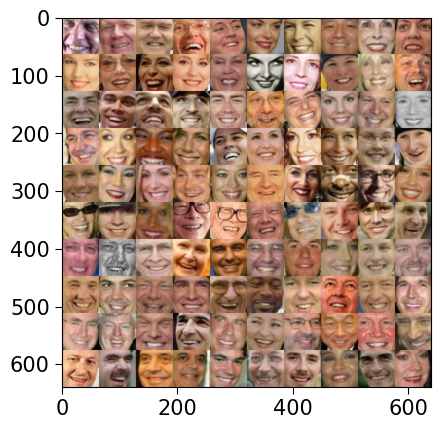

In [49]:
#This is non-flipping. All of them are smiling
n = 0
image_data = np.array(image_data) # to convert the image data back into a numpy array
for x in range(10): #10 images to fit along the x axis
    for y in range (10): #for the y axis
        for z in range (3): #RGB
            canvas[64*x:64*x+64, 64*y:64*y+64,z] = image_data[y+n,:,:,z]
        if y ==9:
            n+=10


pl.imshow(canvas)

In [61]:
#now we are moving to the changing signs
import glob
path = "faces/non_smile"
all_non_smile_images = glob.glob(path + "/*.jpg")
print(len(all_non_smile_images)) # Returns 603. The data content is actually a list of titles for the 603 images
print(type(all_non_smile_images)) #returns list class because this is a list of all the names. Now onto loading the image itself

non_smile_image_data = [] 

n = 1
for filename in all_non_smile_images:
    image2 = Image.open(filename) # This opens each file then loads its as a JPEG
    image3 = np.array(image2) # This takes that file and saves it into an array format
    non_smile_image_data.append(image3)
non_smile_image_data = np.array(non_smile_image_data)
print(type(non_smile_image_data)) # this converts it into an array
print(non_smile_image_data.shape) # returns 603, 64,64,3
print(non_smile_image_data[0][0][0]) # returns [170 127  95]



603
<class 'list'>
<class 'numpy.ndarray'>
(603, 64, 64, 3)
[170 127  95]


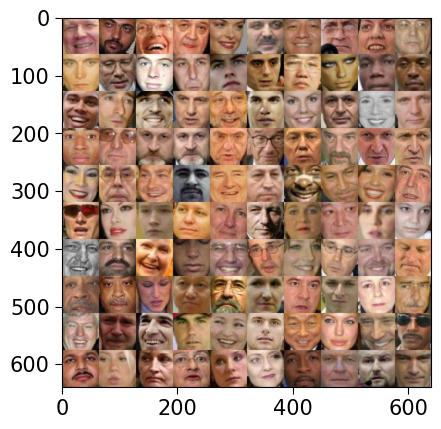

In [62]:
#Now the for loop to switch between then smiling and non-smiling faces
for x in range(10): #10 images to fit along the x axis
    for y in range (10): #for the y axis
        for z in range (3): #RGB
            if (x%2 == 0 ) and (y%2 == 0):
                canvas[64*x:64*x+64, 64*y:64*y+64,z] = image_data[y+n,:,:,z]
            else:
                canvas[64*x:64*x+64, 64*y:64*y+64,z] = non_smile_image_data[y+n,:,:,z]
        if y ==9:
            n+=10
pl.imshow(canvas)

In [21]:
# to_use = np.reshape(total_image_data, (600,600,3))
# print(to_use.shape)
# for i in range (38400): #Note that we finally adjusted this and now we are using the tuple
#     for j in range (64):
#         for k in range (3): # with this set to 2, we expect row zero, column zero and z 0 and 1 to change. Basically, this first line of three elements, we expect the first two to change from 255, 255 to something else. It changes. It goes to 106, 78 which are the first two element 
#             canvas[i][j][k] = image_data[i][j][k]

# print(canvas)

In [22]:
#Consider saving the data as a dataframe instead
df = pd.DataFrame(canvas)
df

ValueError: Must pass 2-d input. shape=(640, 640, 3)